In [57]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 173.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 182.1 MB/s eta 0:00:00


In [63]:
from data import generate_time_series, generate_and_save_time_series, MultiTimeSeriesDataset, TSPreprocessor
from model import DecoderOnlyTransformer
import torch
import random
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [52]:
model = DecoderOnlyTransformer(
        num_layers=4,
        model_dim=256,
        num_heads=16,
        hidden_dim=1024,
        quantized_classes=103,
        padding_idx=102
    )
state_dict = torch.load("TSFM-4L-256Model-1024Hidden/tsfm_160000.pt", weights_only=True)
model.load_state_dict(state_dict)
model.eval()

DecoderOnlyTransformer(
  (embedding): Embedding(103, 256, padding_idx=102)
  (pos_encoding): PositionalEncoding()
  (layers): ModuleList(
    (0-3): 4 x TransformerDecoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (linear1): Linear(in_features=256, out_features=1024, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=1024, out_features=256, bias=True)
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (norm3): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (dropout3): Dropout(p=0.1, i

## Synthetic Data Performance

In [38]:
# generate test samples
generate_and_save_time_series(1024, 1024, "test_dir", series_length_range=(1024, 1024))

Saved 1024 samples to test_dir/preprocessed_data_1.pt


In [39]:
test_tensors, metadata, preprocessor = TSPreprocessor.from_preprocessed_file("test_dir/preprocessed_data_1.pt")
print('Lengths:',len(test_tensors), len(metadata))
ten_lens = [len(t) for t in test_tensors]
print('Min Seq Length:',min(ten_lens))
print('Min Seq Length:',max(ten_lens))

Lengths: 1024 1024
Min Seq Length: 1024
Min Seq Length: 1024


In [47]:
test = test_tensors[0].long()

In [53]:
with torch.no_grad():
    logits = model(test[:512].unsqueeze(0))

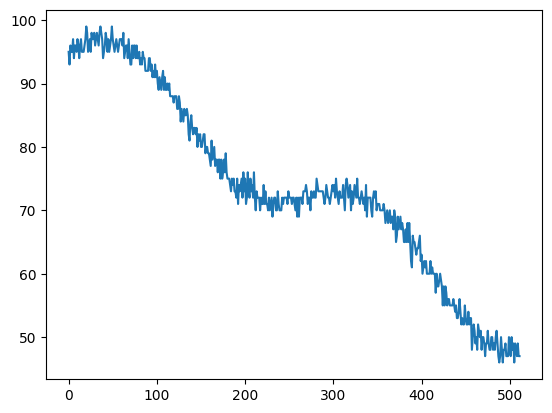

In [65]:
plt.plot(test[:512])

/tmp/ipykernel_4218/3408880447.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.bar(x=list(range(103)), height=F.softmax(logits[0,-1,:]))


<BarContainer object of 103 artists>

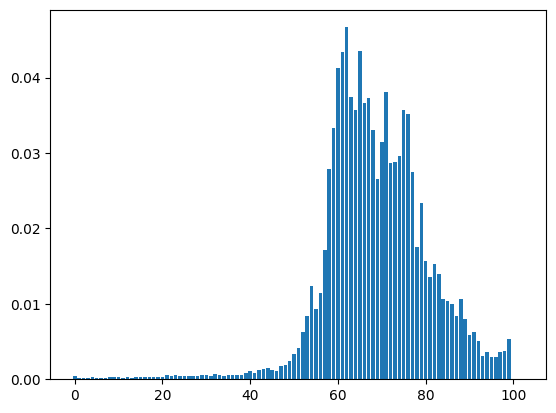

In [64]:
plt.bar(x=list(range(103)), height=F.softmax(logits[0,-1,:]))

In [66]:
logits[0,-1,:].argmax()

tensor(62)

In [96]:
def generate(model, series, min_samples = 512):
    series = series.long()
    print(series.device, series.dtype)
    predictions = []
    for t in range(min_samples, series.shape[0]):
        with torch.no_grad():
            predictions.append(model(series[:t].unsqueeze(0))[0,-1,:].argmax().item())
    return predictions

cuda:0 torch.int64


[]

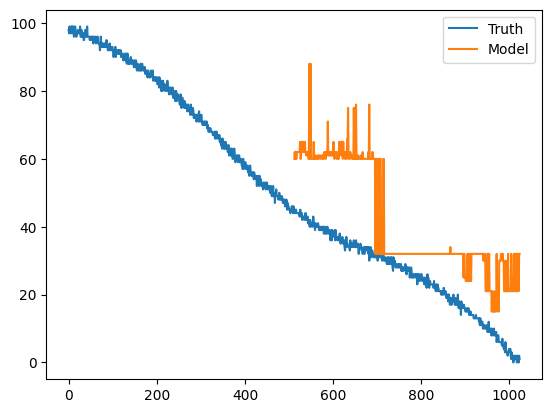

In [104]:
ground_truth = test_tensors[1]
model.to('cuda:0')
result = generate(model, ground_truth.to('cuda:0'), min_samples=512)
plt.plot(list(range(ground_truth.shape[0])), ground_truth, label='Truth')
plt.plot(list(range(512, ground_truth.shape[0])), result, label='Model')
plt.legend()
plt.plot()

cuda:0 torch.int64


[]

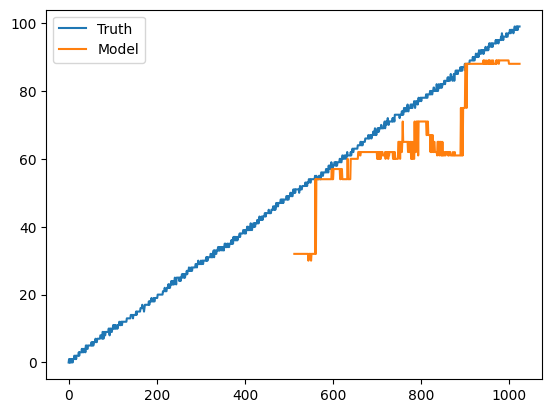

In [105]:
ground_truth = test_tensors[2]
model.to('cuda:0')
result = generate(model, ground_truth.to('cuda:0'), min_samples=512)
plt.plot(list(range(ground_truth.shape[0])), ground_truth, label='Truth')
plt.plot(list(range(512, ground_truth.shape[0])), result, label='Model')
plt.legend()
plt.plot()

cuda:0 torch.int64


[]

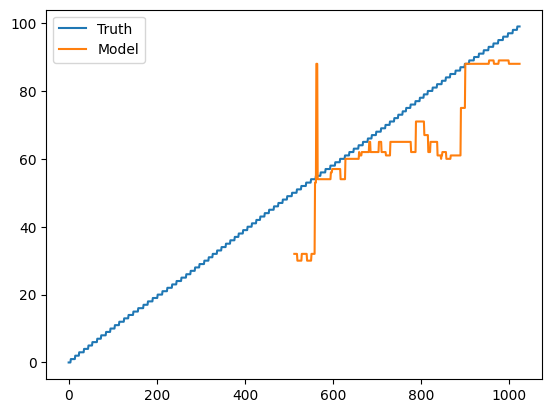

In [106]:
ground_truth = test_tensors[3]
model.to('cuda:0')
result = generate(model, ground_truth.to('cuda:0'), min_samples=512)
plt.plot(list(range(ground_truth.shape[0])), ground_truth, label='Truth')
plt.plot(list(range(512, ground_truth.shape[0])), result, label='Model')
plt.legend()
plt.plot()

cuda:0 torch.int64


[]

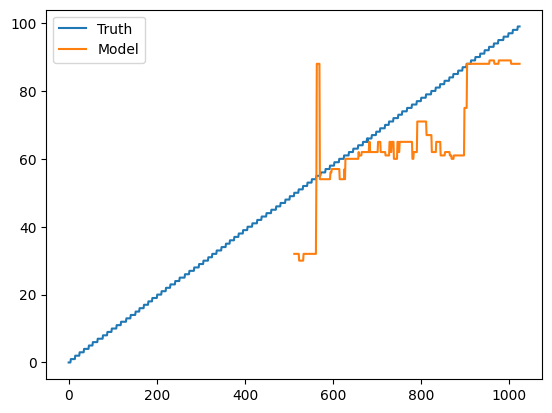

In [107]:
ground_truth = test_tensors[-1]
model.to('cuda:0')
result = generate(model, ground_truth.to('cuda:0'), min_samples=512)
plt.plot(list(range(ground_truth.shape[0])), ground_truth, label='Truth')
plt.plot(list(range(512, ground_truth.shape[0])), result, label='Model')
plt.legend()
plt.plot()

cuda:0 torch.int64


[]

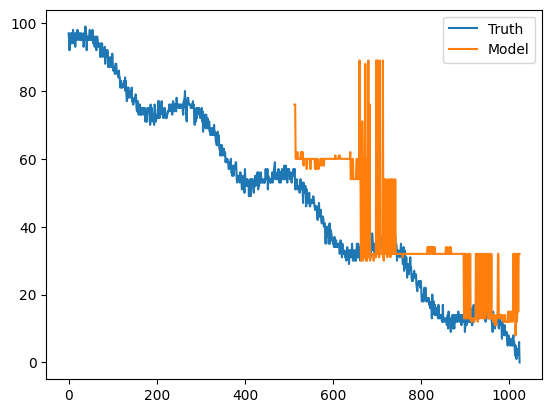

In [108]:
ground_truth = test_tensors[512]
model.to('cuda:0')
result = generate(model, ground_truth.to('cuda:0'), min_samples=512)
plt.plot(list(range(ground_truth.shape[0])), ground_truth, label='Truth')
plt.plot(list(range(512, ground_truth.shape[0])), result, label='Model')
plt.legend()
plt.plot()